In [1]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torch.nn.functional as functional

import matplotlib.pyplot as plt 
import numpy as np
from random import randrange

import torchvision
from torchvision import transforms as transform

# Hyper-prameters
batch_size = 20
EPOCHS = 2
lr = 0.001
data_path = 'datasets/'

def dataset_loader(path=data_path, shuffle=True):
    """
    used to load dataset.
    -> return value is a tuple of (training_data, testing_data).
    """
    train_data = torchvision.datasets.MNIST(
        root=path,
        train=True,
        transform=transform.ToTensor(),
        download=True)
    test_data = torchvision.datasets.MNIST(
        root=path,
        train=False,
        transform=transform.ToTensor(),
        download=True)
    train_loader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=batch_size,
        shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(
        dataset=test_data,
        batch_size=batch_size,
        shuffle=shuffle)
    return train_loader, test_loader 


def sample_viewer(dataset, index=None):
    """
    use it view one sample of the dataset either (training or testing samples based on what you pass). 
    by defult it shows a randome training sample, set an index and triggre 'train' to change the behavior.
    """
    dataset = iter(dataset)
    imgs, labels = dataset.next()
    if index==None: index=randrange(0, len(dataset)) 
    plt.title(f"This sample presents the number '{labels[index]}'.")
    plt.imshow(np.transpose(imgs[index], (1, 2, 0)))
    plt.show()

def network_buldir():
    """
    Neural network archtechture (mainly designd for MNIST).
    """
    class MnistNet_partI(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_layer = nn.Linear(in_features=28*28, out_features=15)
            self.output_layer = nn.Linear(in_features=15, out_features=10)


        def forward(self, input):
            input = torch.flatten(input, 1)
            input = functional.relu(self.input_layer(input))
            input = self.output_layer(input)
            return input
    net = MnistNet_partI()
    return net, nn.CrossEntropyLoss(), optimizer.SGD(net.parameters(), lr=lr)

def network_tranier(network, loss_fun, optimizer, training_data, root='mnist_net.pth'):
    """
    used to train a given network, after trainging a ".pth" file will be a generated.
    """
    print("Training...")
    for epoch in range(EPOCHS):
        for batch in training_data:
            img_sample, labels = batch

            optimizer.zero_grad()
            outputs = network(img_sample)
            loss = loss_fun(outputs, labels)
            loss.backward()
            optimizer.step()

    torch.save(network.state_dict(), root)
    

    

Accuracy of the network on the 10000 test images:96.52%


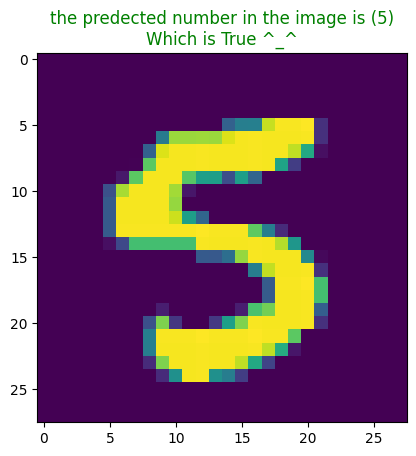

In [33]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torch.nn.functional as functional

import matplotlib.pyplot as plt 
import numpy as np
from random import randrange

import torchvision
from torchvision import transforms as transform

# Hyper-prameters
batch_size = 10
EPOCHS = 5
lr =0.01
data_path = 'datasets/'
trained_model_path = 'mnist_net.pth'

def dataset_loader(path=data_path, shuffle=True):
    """
    used to load dataset.
    -> return value is a tuple of (training_data, testing_data).
    """
    train_data = torchvision.datasets.MNIST(
        root=path,
        train=True,
        transform=transform.ToTensor(),
        download=True)
    test_data = torchvision.datasets.MNIST(
        root=path,
        train=False,
        transform=transform.ToTensor(),
        download=True)
    train_loader = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=batch_size,
        shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(
        dataset=test_data,
        batch_size=batch_size,
        shuffle=shuffle)
    return train_loader, test_loader 

def sample_viewer(dataset, index=None):
    """
    use it view one sample of the dataset either (training or testing samples based on what you pass). 
    by defult it shows a randome training sample, set an index and triggre 'train' to change the behavior.
    """
    dataset = iter(dataset)
    imgs, labels = dataset.next()
    if index==None: index=randrange(0, len(dataset)) 
    plt.title(f"This sample presents the number '{labels[index]}'.")
    plt.imshow(np.transpose(imgs[index], (1, 2, 0)))
    plt.show()

def network_buldir():
    """
    Neural network archtechture (mainly designd for MNIST).
    return value is -> (network_instence, loss_function, opimizer_instence)
    """
    class MnistNet_partI(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_lay = nn.Linear(in_features=28*28, out_features=120)
            self.headen1_lay = nn.Linear(in_features=120, out_features=84)
            self.output_lay = nn.Linear(in_features=84, out_features=10)


        def forward(self, x):
            x = torch.flatten(x, 1)
            x = functional.relu(self.input_lay(x))
            x = functional.relu(self.headen1_lay(x))
            x = self.output_lay(x)
            return x
    net_ins = MnistNet_partI()
    return net_ins, nn.CrossEntropyLoss(), optimizer.SGD(net_ins.parameters(), lr=lr)


def network_tranier(network, loss_fun, optimizer, training_data, model_root=trained_model_path):
    """
    used to train a given network, after trainging a ".pth" file will be a generated.
    """
    print("Training...")
    for epoch in range(EPOCHS):
        batch_counter = 1
        for batch in training_data:
            print(f"epoch {epoch+1}/{EPOCHS}    batch {batch_counter}/{len(training_data)}")
            img_sample, labels = batch

            optimizer.zero_grad()
            outputs = network(img_sample)
            loss = loss_fun(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_counter+=1
    print("\n^DONE^\n")
    torch.save(network.state_dict(), model_root)

def network_prediction(network, testing_data, model_root=trained_model_path):
    """
    """
    network.load_state_dict(torch.load(model_root))
    test_sampels = iter(testing_data)
    imges, labels = test_sampels.next()
    results = network(imges[0])
    _, predicted = torch.max(results, 1)
    color = 'red'
    title = f'the predected number in the image is ({int(predicted)})\nBUT! desired number is ({labels[0]})'
    if predicted==labels[0]: 
        color='green'
        title= f'the predected number in the image is ({int(predicted)})\nWhich is True ^_^'
    plt.title(title, color=color)
    plt.imshow(np.transpose(imges[0], (1, 2, 0)))
    plt.show

def accuracy_evalutor(network, testing_data):
    # Measure accuracy for each class
    correct_pred = 0
    
    with torch.no_grad():
        for data in testing_data:
            images, labels = data
            
            outputs = network(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction: correct_pred+= 1
    print(f'Accuracy of the network on the {len(testing.dataset)} test images:{(correct_pred/len(testing.dataset))* 100}%')



trainig, testing = dataset_loader()
net, loss_fun, optim =  network_buldir()

# network_tranier(network=net,
#                 loss_fun=loss_fun,
#                 optimizer=optim,
#                 training_data=trainig)

network_prediction(network=net,
                   testing_data=testing)

accuracy_evalutor(network=net, testing_data=testing)
